In [1]:
from utils import *
import os
import pandas as pd

## IVS Wall 

In [2]:
DATA_PATH = 'E:/UKBB_NIFTI'

(208, 186, 1)


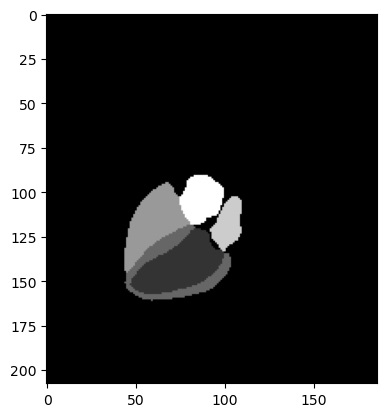

In [3]:
la_ed_img_path = os.path.join(DATA_PATH,'4232351/la_4ch_ED.nii.gz')
la_ed_seg_path = os.path.join(DATA_PATH,'4232351/seg4_la_4ch_ED.nii.gz')
nim = nib.load(la_ed_img_path)
img = nim.get_fdata()
seg_nim = nib.load(la_ed_seg_path)
seg_img = seg_nim.get_fdata()
print(seg_img.shape)
MatPlot(seg_img[:,:,0])

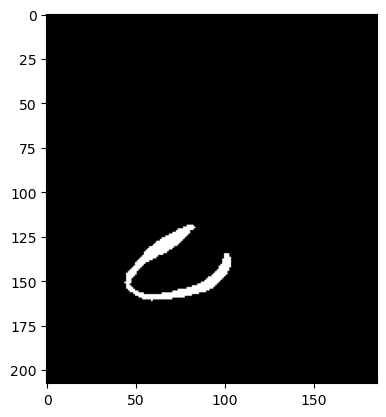

In [4]:
MatPlot(seg_img[:,:,0]==2)

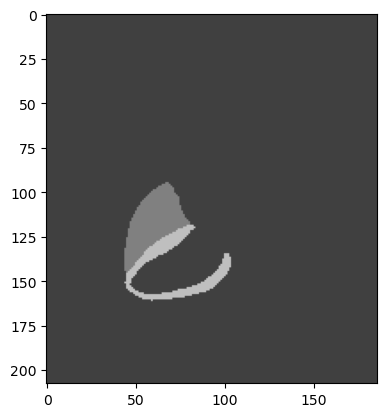

In [5]:
soi = seg_img[:,:,0]
plt.imshow(soi==3,cmap='gray',alpha=0.5)
plt.imshow(soi==2,cmap='gray',alpha=0.5)

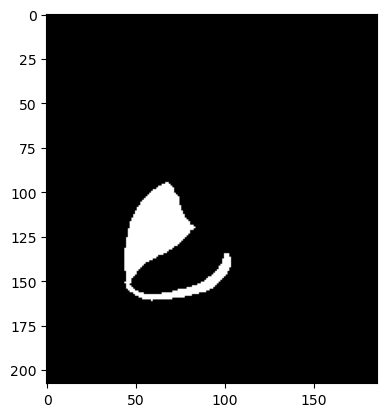

In [6]:
rv_mask = soi==3
wall_mask = soi==2 
plt.imshow((rv_mask | wall_mask),cmap='gray')

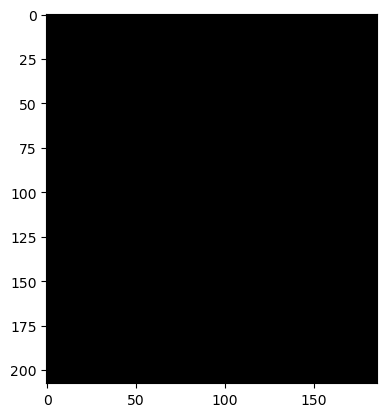

In [57]:
overlap = np.logical_and(rv_mask,wall_mask)
plt.imshow(overlap,cmap='gray')

In [58]:
imgray = (255*rv_mask).astype(np.uint8)
contours, hierarchy = cv2.findContours(imgray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros(img.shape)
cont = contours[0]

In [59]:
imgray = (255*wall_mask).astype(np.uint8)
contours1, hierarchy1 = cv2.findContours(imgray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros(img.shape)
cont1 = contours1[0]

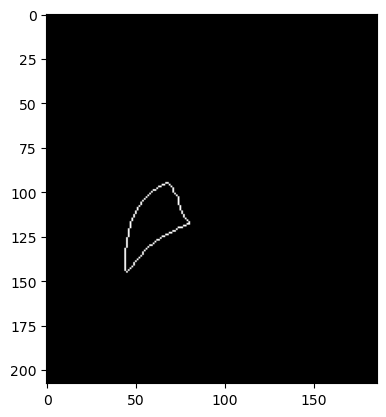

In [93]:
blank=np.zeros((imgray.shape[0],imgray.shape[1]))
cv2.drawContours(blank,contours,-1,(255,50,255),1)
# cv2.drawContours(blank,contours1,-1,(255,50,255),1)
plt.imshow(blank,cmap='gray')

In [36]:
rv = set((tuple(i) for i in cont[:,0,:]))
wall = set((tuple(i) for i in cont1[:,0,:]))
rv.intersection(wall)

set()

In [60]:
overlap = []
cont1 = sorted(cont1[:,0,:], key=lambda x: x[0])
cont = sorted(cont[:,0,:], key=lambda x: x[0])

In [84]:
cont

[array([ 44, 132], dtype=int32),
 array([ 44, 144], dtype=int32),
 array([ 45, 126], dtype=int32),
 array([ 45, 131], dtype=int32),
 array([ 45, 145], dtype=int32),
 array([ 46, 121], dtype=int32),
 array([ 46, 125], dtype=int32),
 array([ 47, 117], dtype=int32),
 array([ 47, 120], dtype=int32),
 array([ 48, 115], dtype=int32),
 array([ 48, 116], dtype=int32),
 array([ 49, 113], dtype=int32),
 array([ 49, 114], dtype=int32),
 array([ 49, 141], dtype=int32),
 array([ 49, 140], dtype=int32),
 array([ 50, 111], dtype=int32),
 array([ 50, 112], dtype=int32),
 array([ 51, 109], dtype=int32),
 array([ 51, 110], dtype=int32),
 array([ 53, 106], dtype=int32),
 array([ 53, 107], dtype=int32),
 array([ 54, 135], dtype=int32),
 array([ 54, 134], dtype=int32),
 array([ 58, 130], dtype=int32),
 array([ 59, 130], dtype=int32),
 array([60, 99], dtype=int32),
 array([61, 99], dtype=int32),
 array([ 62, 127], dtype=int32),
 array([63, 97], dtype=int32),
 array([ 63, 127], dtype=int32),
 array([64, 97],

In [94]:
def fuzzy_equals(tup1,tup2,thresh):
    if abs(tup1[0]-tup2[0]) <= thresh and abs(tup1[1]-tup2[1]) <= thresh:
        print(tup1,tup2)
        if tup2[1] > tup1[1]:
            print("Overflow? ", tup1, tup2)
            return False
        return True

In [95]:
for i in range(len(cont)):
    if fuzzy_equals(cont[i], cont1[i],8):
        overlap.append(cont1[i])

[ 44 144] [ 45 146]
Overflow?  [ 44 144] [ 45 146]
[ 49 140] [ 50 146]
Overflow?  [ 49 140] [ 50 146]
[ 58 130] [ 55 134]
Overflow?  [ 58 130] [ 55 134]
[ 59 130] [ 55 135]
Overflow?  [ 59 130] [ 55 135]
[ 68 124] [ 62 128]
Overflow?  [ 68 124] [ 62 128]
[ 71 122] [ 65 126]
Overflow?  [ 71 122] [ 65 126]
[ 72 122] [ 66 126]
Overflow?  [ 72 122] [ 66 126]
[ 80 118] [ 72 123]
Overflow?  [ 80 118] [ 72 123]


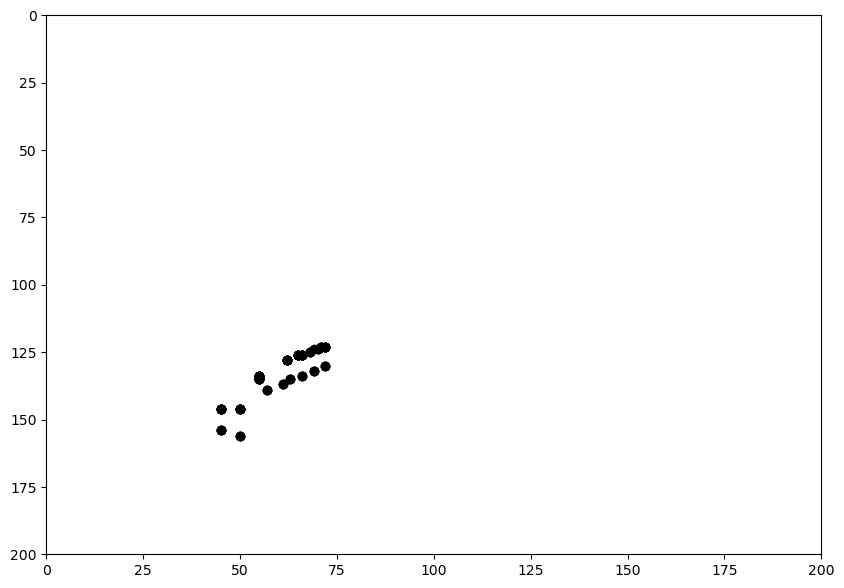

In [96]:
x = [o[0] for o in overlap]
y = [o[1] for o in overlap]
plt.figure(figsize=(10,7))
plt.scatter(x,y,color='black')
plt.ylim([0,200])
plt.gca().invert_yaxis()
plt.xlim([0,200])
plt.show()

## WT Ratio 

In [2]:
lvwt = pd.read_csv('D:/UKB/ukbb_cardiac/wt_test.csv')
rvwt = pd.read_csv('D:/UKB/ukbb_cardiac/wt_rv_test.csv')

In [4]:
lvwt = lvwt.rename(columns={'Unnamed: 0':'idx'})
rvwt = rvwt.rename(columns={'Unnamed: 0':'idx'})

In [5]:
rvwt.head()

,idx,WT_AHA_1 (mm),WT_AHA_2 (mm),WT_AHA_3 (mm),WT_AHA_4 (mm),WT_AHA_5 (mm),WT_AHA_6 (mm),WT_AHA_7 (mm),WT_AHA_8 (mm),WT_AHA_9 (mm),WT_AHA_10 (mm),WT_AHA_11 (mm),WT_AHA_12 (mm),WT_AHA_13 (mm),WT_AHA_14 (mm),WT_AHA_15 (mm),WT_AHA_16 (mm),WT_Global (mm)
0,1000158,4.166978,5.602421,2.183013,3.431258,12.761274,6.187657,0.659610,0.191226,0.207894,0.243535,5.978085,13.772573,2.634920,0.192359,0.254687,6.126725,4.443957
1,1000243,10.200934,12.789775,7.650095,4.731575,13.228914,10.725562,0.289992,0.180204,0.191117,0.229949,7.261281,11.045595,3.083892,1.521639,1.810981,8.273745,6.355133
2,1000262,0.092208,0.075403,0.190363,0.193849,10.335364,6.823457,1.078693,0.194326,0.231196,0.153960,7.830747,14.254771,2.209628,0.236330,0.280434,5.126829,3.236974
3,1000369,4.613593,2.514218,0.586015,4.804327,12.541716,4.537775,0.235385,0.216380,0.213698,0.183541,11.942996,8.316191,1.272534,0.236418,0.565581,10.825139,3.716458
4,1000489,7.005453,11.156920,8.924324,4.052159,11.476860,12.301200,0.275512,0.281158,0.194110,0.253862,9.069053,11.641350,2.369142,0.194291,0.246379,8.799869,5.165451


In [6]:
wt_ratio = rvwt['WT_Global (mm)']/lvwt['WT_Global (mm)']

In [12]:
len(wt_ratio)

44492

In [22]:
d = {'idx':rvwt['idx'],'pheno':wt_ratio}
df_wt = pd.DataFrame(d)
df_wt.head()

,idx,pheno
0,1000158.0,0.702391
1,1000243.0,1.033304
2,1000262.0,0.665256
3,1000369.0,0.709759
4,1000489.0,0.971311


In [23]:
df_wt.to_csv('I:/UKB_DATA/tsv_pheno/wt_ratio.tsv',sep='\t')

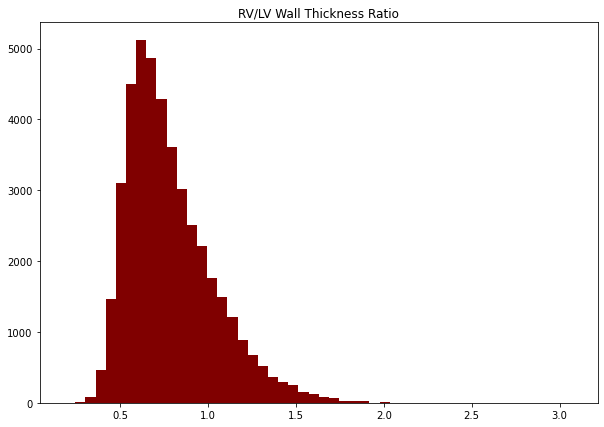

In [19]:
plt.figure(figsize=(10,7))
plt.hist(wt_ratio,color='maroon',bins=50)
plt.title('RV/LV Wall Thickness Ratio')
plt.show()

In [17]:
print('RV/LV WT mean, std, max, min: ',np.mean(wt_ratio),np.std(wt_ratio),np.max(wt_ratio),np.min(wt_ratio))

RV/LV WT mean, std, max, min:  0.7860395550083966 0.2484482373446905 3.0723156290989024 0.18656081973948033


## EF Ratio 

In [6]:
lvedv = pd.read_csv('I:/UKB_DATA/tsv_pheno/filter_lvedv.tsv',sep='\t')
lvesv = pd.read_csv('I:/UKB_DATA/tsv_pheno/filter_lvesv.tsv',sep='\t')
rvesv = pd.read_csv('I:/UKB_DATA/tsv_pheno/filter_rvesv.tsv',sep='\t')
rvedv = pd.read_csv('I:/UKB_DATA/tsv_pheno/filter_rvedv.tsv',sep='\t')

In [19]:
rvedv.head()

,Unnamed: 0,idx,pheno
0,0,1000158,139.848210
1,1,1000243,137.187312
2,2,1000262,142.559277
3,3,1000369,120.311519
4,4,1000489,129.418282


In [39]:
rv = pd.merge(rvesv,rvedv,on='idx') 

In [40]:
rv.drop(columns=['Unnamed: 0_x','Unnamed: 0_y'],inplace=True)

In [41]:
rv = rv.rename(columns={'pheno_x':'rvesv','pheno_y':'rvedv'})
rv['rvsv'] = rv['rvedv'] - rv['rvesv']

In [42]:
print('Before QC: ',rv.shape[0])

Before QC:  44646


In [43]:
rv = rv[rv['rvsv'] > 0.]
print('After QC: ', rv.shape[0])

After QC:  44637


In [44]:
lv = pd.merge(lvesv,lvedv,on='idx')
lv.drop(columns=['Unnamed: 0_x','Unnamed: 0_y'],inplace=True)
lv = lv.rename(columns={'pheno_x':'lvesv','pheno_y':'lvedv'})
lv['lvsv'] = lv['lvedv'] - lv['lvesv']

In [45]:
print('Before QC: ',lv.shape[0])
lv = lv[lv['lvsv'] > 0.]
print('After QC: ', lv.shape[0])

Before QC:  44646
After QC:  44646


In [46]:
lv = lv[lv['idx'].isin(rv['idx'])]
print('Intersection of LV and RV phenotypes: ', lv.shape[0])

Intersection of LV and RV phenotypes:  44637


In [47]:
rv['rvef'] = rv['rvsv']/rv['rvedv']
lv['lvef'] = lv['lvsv']/lv['lvedv']

In [51]:
ef_ratio = rv['rvef']/lv['lvef']

In [54]:
print(max(ef_ratio),min(ef_ratio))

3.7884684567403557 0.052034601590755


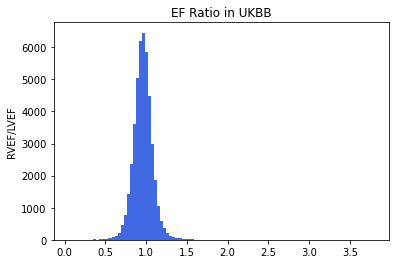

In [53]:
plt.hist(ef_ratio,bins=100,color='royalblue')
plt.ylabel('RVEF/LVEF')
plt.title('EF Ratio in UKBB')
plt.show()

In [55]:
all_rv_lv = pd.merge(rv,lv,on='idx')
all_rv_lv.head()

,idx,rvesv,rvedv,rvsv,rvef,Unnamed: 0.1_x,Unnamed: 0.1.1_x,lvesv,Unnamed: 0.1_y,Unnamed: 0.1.1_y,lvedv,lvsv,lvef
0,1000158,77.352526,139.848210,62.495684,0.446882,0,0,61.696808,0,0,158.741292,97.044484,0.611337
1,1000243,54.248591,137.187312,82.938721,0.604566,1,1,60.936220,1,1,145.006383,84.070163,0.579769
2,1000262,54.112948,142.559277,88.446329,0.620418,2,2,54.095926,2,2,136.482422,82.386496,0.603642
3,1000369,43.082690,120.311519,77.228829,0.641907,3,3,43.610372,3,3,122.030741,78.420369,0.642628
4,1000489,60.138734,129.418282,69.279549,0.535315,4,4,51.542622,4,4,132.533309,80.990686,0.611097


In [56]:
all_rv_lv.drop(columns=['Unnamed: 0.1_x','Unnamed: 0.1.1_x','Unnamed: 0.1_y','Unnamed: 0.1.1_y'],inplace=True)
all_rv_lv['ef ratio'] = all_rv_lv['rvef']/all_rv_lv['lvef']

In [57]:
all_rv_lv.head()

,idx,rvesv,rvedv,rvsv,rvef,lvesv,lvedv,lvsv,lvef,ef ratio
0,1000158,77.352526,139.848210,62.495684,0.446882,61.696808,158.741292,97.044484,0.611337,0.730991
1,1000243,54.248591,137.187312,82.938721,0.604566,60.936220,145.006383,84.070163,0.579769,1.042770
2,1000262,54.112948,142.559277,88.446329,0.620418,54.095926,136.482422,82.386496,0.603642,1.027791
3,1000369,43.082690,120.311519,77.228829,0.641907,43.610372,122.030741,78.420369,0.642628,0.998878
4,1000489,60.138734,129.418282,69.279549,0.535315,51.542622,132.533309,80.990686,0.611097,0.875990


In [61]:
print('N =',all_rv_lv.shape[0],'participants')

N = 44637 participants


In [25]:
edit = pd.read_csv('I:/UKB_DATA/tsv_pheno/filter_ukbb_rv_lv_ef.tsv',sep='\t')
edit.head()

,Unnamed: 0,idx,rvesv,rvedv,rvsv,rvef,lvesv,lvedv,lvsv,lvef,ef ratio
0,0,1000158,77.352526,139.848210,62.495684,0.446882,61.696808,158.741292,97.044484,0.611337,0.730991
1,1,1000243,54.248591,137.187312,82.938721,0.604566,60.936220,145.006383,84.070163,0.579769,1.042770
2,2,1000262,54.112948,142.559277,88.446329,0.620418,54.095926,136.482422,82.386496,0.603642,1.027791
3,3,1000369,43.082690,120.311519,77.228829,0.641907,43.610372,122.030741,78.420369,0.642628,0.998878
4,4,1000489,60.138734,129.418282,69.279549,0.535315,51.542622,132.533309,80.990686,0.611097,0.875990


In [26]:
edit = edit.rename(columns={'ef ratio':'pheno'})

In [27]:
edit.to_csv('I:/UKB_DATA/tsv_pheno/filter_ukbb_ef_ratio.tsv',sep='\t')

In [62]:
all_rv_lv.to_csv('I:/UKB_DATA/tsv_pheno/filter_ukbb_rv_lv_ef.tsv',sep='\t')

## ----------------- PREV -------------------

In [10]:
def calc_ef(df1, df2, col):
    df1 = df1.dropna()
    df2 = df2.dropna()
    sv = df2[col] - df1[col]
    return sv/df2[col]

In [11]:
lvef = calc_ef(lvesv,lvedv,'pheno')
rvef = calc_ef(rvesv,rvedv,'pheno')

In [12]:
len(lvef), len(rvef)

(44654, 44654)

In [13]:
ef_ratio = rvef/lvef

In [16]:
max(ef_ratio),min(ef_ratio)

(879.2743170030466, -492.5663089226438)

Text(0.5, 1.0, 'EF Ratio in UKBB Participants')

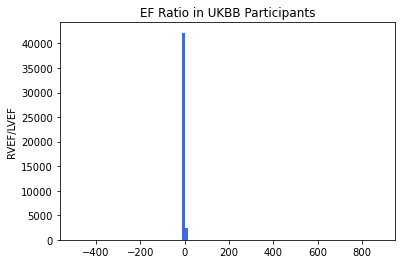

In [15]:
plt.hist(ef_ratio,color='royalblue',bins=100)
plt.ylabel('RVEF/LVEF')
plt.title('EF Ratio in UKBB Participants')